In [2]:
import pandas as pd
import seaborn as sns

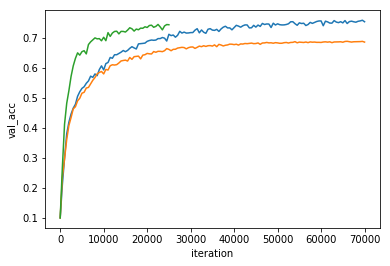

In [11]:
# figure 1
fixed = pd.read_csv('./results/fixed.csv')
exp = pd.read_csv('./results/exp.csv')
tri = pd.read_csv('./results/triangular2.csv')
sns.lineplot(x='iteration', y='val_acc', data=fixed)
sns.lineplot(x='iteration', y='val_acc', data=exp)
sns.lineplot(x='iteration', y='val_acc', data=tri)

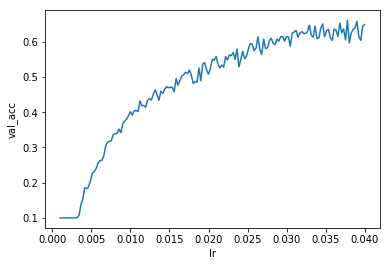

In [3]:
# figure 3
lrrt = pd.read_csv('./results/lrrt2.csv')
sns.lineplot(x='lr', y='val_acc', data=lrrt)